Enabling multithreading for training...
Loading images...
Loaded 24320 images.
Encoding labels...
Encoded labels: ['Dataset\\Dataset of Artificial Maksed Original\\(0-10)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(0-10)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(11-20)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(11-20)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(21-30)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(21-30)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(31-40)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(31-40)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(41-50)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(41-50)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(51-60)_Female'
 'Dataset\\Dataset of Artificial Maksed Original\\(51-60)_Male'
 'Dataset\\Dataset of Artificial Maksed Original\\(61-70)_Female'
 'Dataset\\Dataset of Artificial Maksed Or

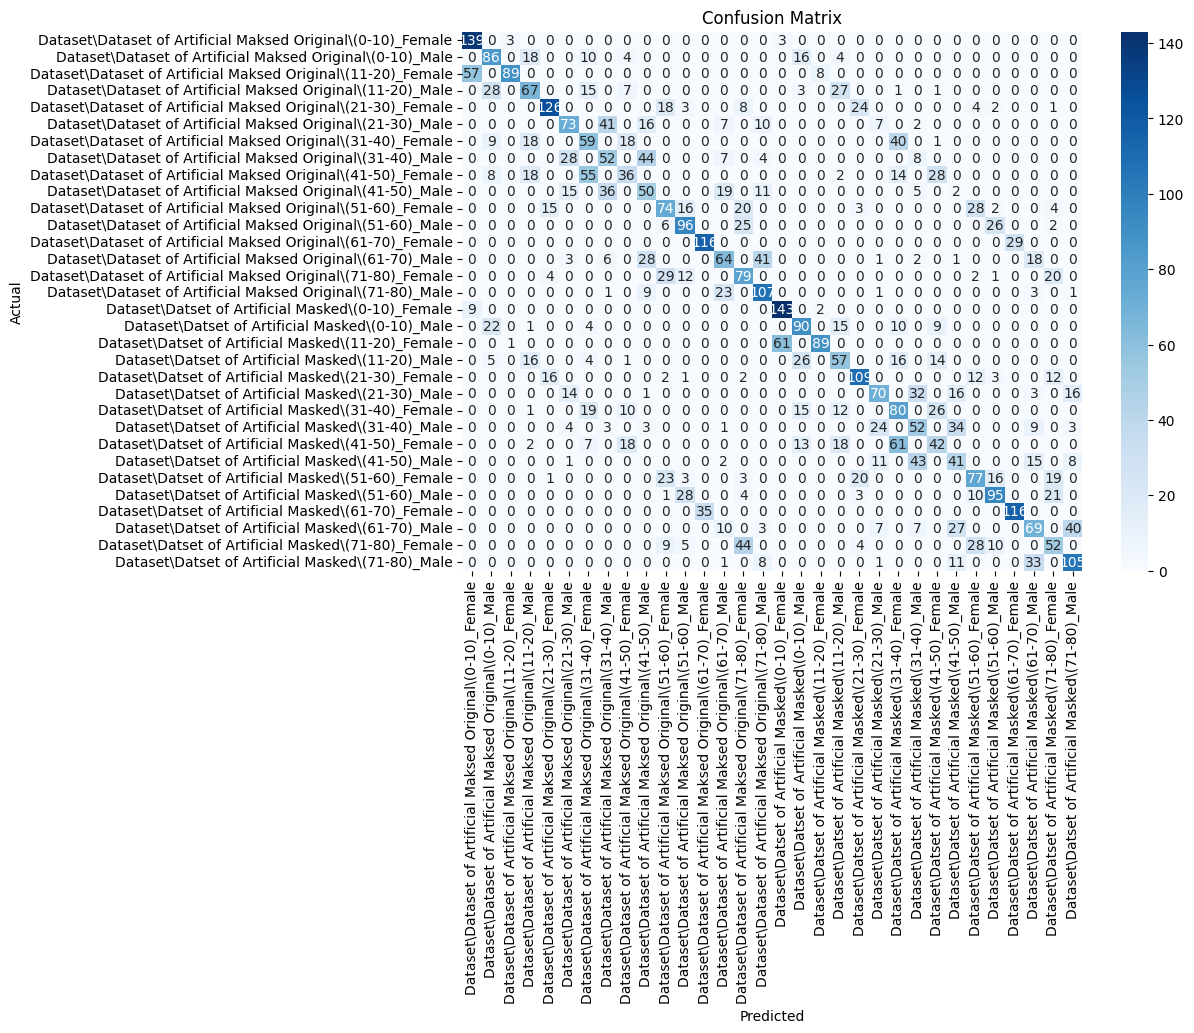

Saving the trained model and the scaler...


NameError: name 'model' is not defined

In [1]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from skimage.feature import hog
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import joblib 
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import joblib
 
print("Enabling multithreading for training...")
os.environ['OMP_NUM_THREADS'] = str(os.cpu_count())

# Function to load images and extract HOG features
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, (128, 128))
                hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
                images.append(hog_features)
                labels.append(subdir.split('/')[-1])  # Assuming subfolder name is the label
    return images, labels

# Load the dataset
data_folder = 'Dataset'
print("Loading images...")
images, labels = load_images_from_folder(data_folder)
print(f"Loaded {len(images)} images.")

# Encode labels
print("Encoding labels...")
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print(f"Encoded labels: {label_encoder.classes_}")

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Train Naive Bayes classifier
print("Training Naive Bayes classifier...")
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("Training completed.")

# Predict on test set
print("Predicting on test set...")
y_pred = clf.predict(X_test)


# Evaluate the classifier
print("Evaluating the classifier...")

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Evaluate the model
print("Evaluating the model...")
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and the scaler
print("Saving the trained model and the scaler...")
model.save('mlp_image_classification_model.pkl')
model.save('mlp_image_classification_model.h5')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Trained model and scaler saved successfully!")